# Create microgeo dataset

Created by 
* [Li, Chaonan (李超男)](https://www.researchgate.net/profile/Chaonan-Li-5) / licn@mtc.edu.cn / [Ecological Security and Protection Key Laboratory of Sichuan Province, Mianyang Normal University](https://zdsys.mtc.edu.cn/)
* Liao, Haijun (廖海君) / liaohj@mtc.edu.cn /
[Engineering Research Center of Chuanxibei RHS Construction at Mianyang Normal University of Sichuan Province](https://rhs.mtc.edu.cn/)

Reviewed by [Li, Xiangzhen (李香真)](https://www.researchgate.net/profile/Xiangzhen-Li-2) / lixz@fafu.edu.cn /
[College of Resources and Environment, Fujian Agriculture and Forestry University](https://zhxy.fafu.edu.cn/main.htm)

Because there are a large number of microbial datasets in geographic analysis, we designed several functions to help users in creating a standard dataset. Such a dataset is not mandatory, but it can ensure that all data used for the biogeographic analysis are always right. 

Now, let's go through each of these functions and see how to create a standard microgeo dataset.

## Load required R packages

Here we need four R packages for this section of microgeo R package tutorial. Just run the following codes to import them into R environment.

In [1]:
# Install and load `magrittr`, `ggplot2`, `devtools` and `microgeo` packages 
if (!suppressMessages(require(magrittr))) install.packages("magrittr")
if (!require(ggplot2)  %>% suppressMessages) install.packages("ggplot2")
if (!require(devtools) %>% suppressMessages) install.packages("devtools")
if (!require(microgeo) %>% suppressMessages) devtools::install_github("ChaonanLi/microgeo")

## Create a standard microgeo dataset

We designed a function named by `create_dataset()` to created a standard mcirogeo dataset. Detailed descriptions for the parameters are avaliable in it help document. Just type `?create_dataset()` in your R console to view the help document. Here are some simple examples.

In [2]:
# Example by using the map downloaded from the DataV.GeoAtlas
data(qtp)
map <- read_aliyun_map(adcode = c(540000, 630000, 510000)) %>% suppressMessages() # head(map@data)
dataset.dts.aliyun <- create_dataset(mat = qtp$asv, ant = qtp$tax, met = qtp$met, map = map,
                                     phy = qtp$tre, env = qtp$env, lon = "longitude", lat = "latitude") 

ℹ [2023-10-12 10:49:41] INFO ==> all samples fall within the map area!

ℹ [2023-10-12 10:49:41] INFO ==> dataset has been created successfully!

ℹ [2023-10-12 10:49:41] INFO ==> use `object %>% show_dataset()` to check the summary of dataset.



In [3]:
# Example by using the map loaded from a local ESRI Shapefile
data(qtp)
qtp.map <- system.file("shapefiles/qtp-map", "DBATP_Polygon.shp", package = "microgeo") %>% read_shp_map() %>% suppressMessages()
qtp.map@data$NAME <- "Qinghai-Tibet Plateau" 
qtp.map %<>% trans_map_fmt(var = 'NAME') # head(qtp.map@data)
dataset.dts.qtp <- create_dataset(mat = qtp$asv, ant = qtp$tax, met = qtp$met, map = qtp.map,
                                  phy = qtp$tre, env = qtp$env, lon = "longitude", lat = "latitude") 

! [2023-10-12 10:49:45] WARN ==> there are 3 out of 1244 samples exceed the range of map area, please delete them or use a suitable map!

! [2023-10-12 10:49:45] WARN ==> you can use `check_map_area()` to show these samples.

ℹ [2023-10-12 10:49:45] INFO ==> dataset has been created successfully!

ℹ [2023-10-12 10:49:45] INFO ==> use `object %>% show_dataset()` to check the summary of dataset.



## Show the content of a microgeo dataset

To show the content of a microgeo dataset created by `create_dataset()`, we designed a function named by `show_dataset()`. Here is a simple example.

In [4]:
# Show the summary of dataset 
dataset.dts.aliyun %>% show_dataset() 
# dataset.dts.qtp %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


## Check whether all sampling sites fall in the map areas

In some cases, our sampling sites may fall outside the boundary range of the map. We designed a function named by `check_map_area()` to find them. Here we give two examples, and all sampling site fall in the boundary range of map in the first example but there are three sampling sites fall outside the boundary range of map in the second example.

In [5]:
# First example 
check.rst1 <- dataset.dts.aliyun$map %>% check_map_area(met = dataset.dts.aliyun$met, lon = 'longitude', lat = 'latitude')
head(check.rst1) # it is expected to be 0 for this test dataset

ℹ [2023-10-12 10:49:48] INFO ==> all samples fall within the map area!



longitude,latitude
<dbl>,<dbl>


In [6]:
# Second example 
check.rst2 <- dataset.dts.qtp$map %>% check_map_area(met = dataset.dts.qtp$met, lon = 'longitude', lat = 'latitude')
head(check.rst2) # it is expected to be 3 for this test dataset

! [2023-10-12 10:49:51] WARN ==> there are 3 out of 1244 samples exceed the range of map area, please delete them or use a suitable map!



,longitude,latitude
,<dbl>,<dbl>
s833,102.7165,36.21301
s834,102.7165,36.21301
s835,102.7165,36.21301


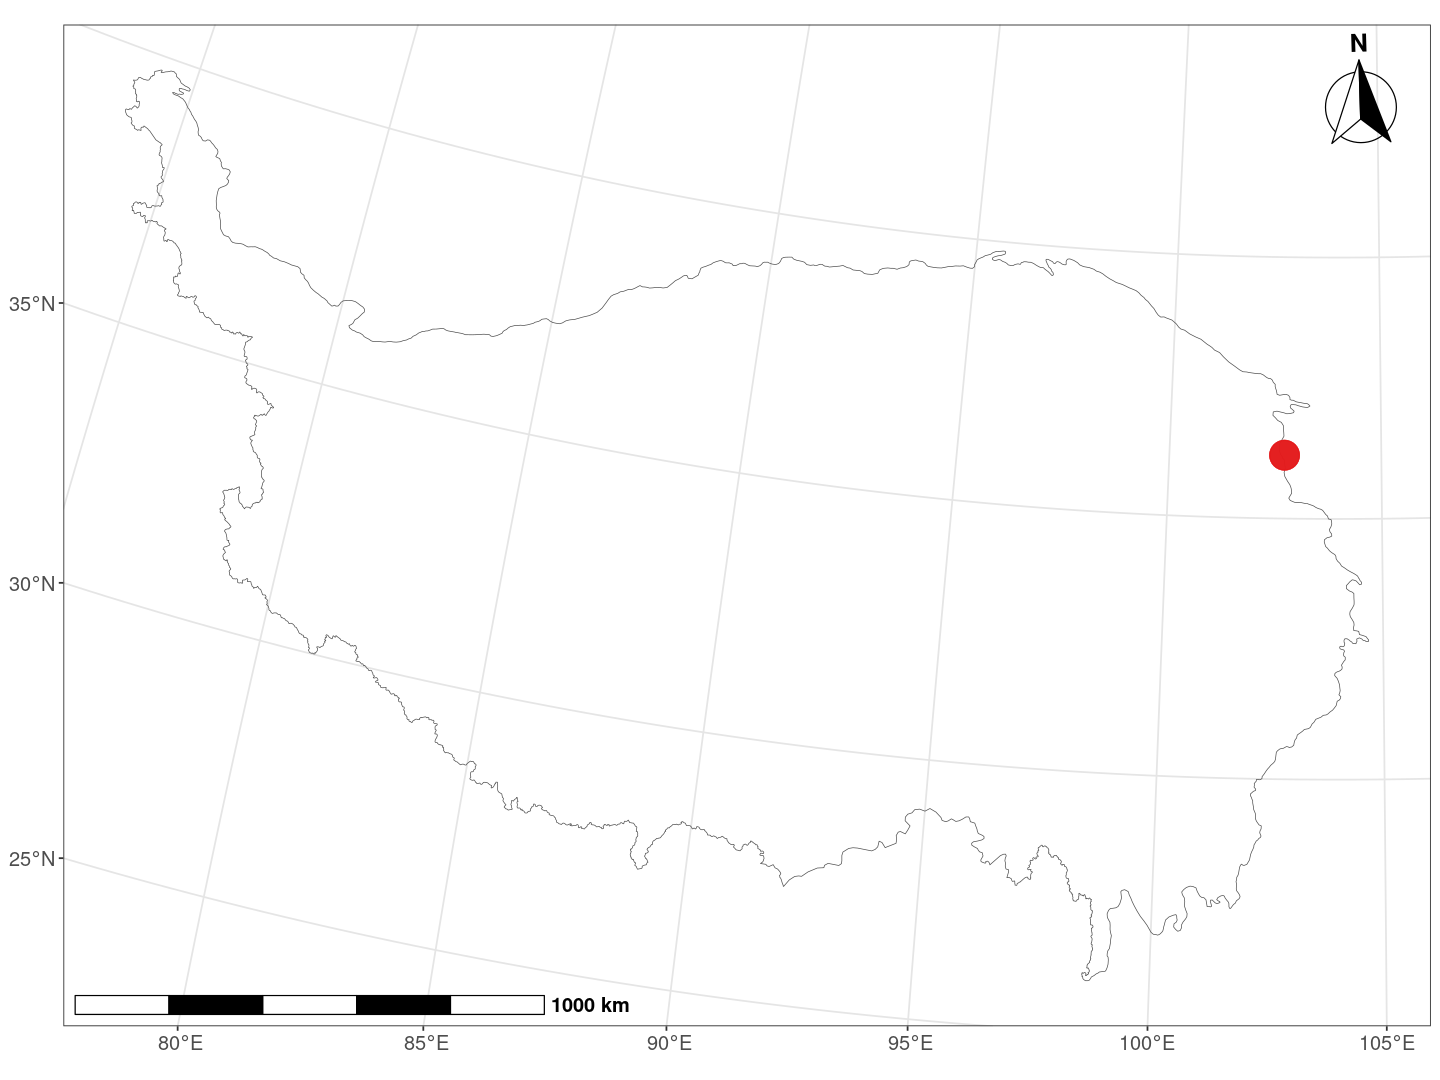

In [7]:
# Plot a map to show the position of these samples on map [Second example]
# See the tutorial about visualization for more details
options(repr.plot.width = 8 * 1.5, repr.plot.height = 6 * 1.5)
dataset.dts.qtp$map %>% plot_bmap() %>% add_sampl_site(met = check.rst2, point.size = 8) %>% 
    add_scale_bar() %>% add_north_arrow() %>% add_crs()
# Three samples locate on the boundary of map
# Thus, we can ignore the warnings during creating microgeo dataset, if we use the current map.
# However, if you plan to merge some microbial traits with this map or extact a metadata table from this map, these three samples would be automatically removed！

## Rarefy the count table

Due to the differences in sequencing depth, if the ASV/gene abundance table contains count value, it is usually necessary to resample the ASV/gene abundance table before calculating any microbial trait to ensure the accuracy and reliability of the results. Thus, we designed a function named by `rarefy_count_table()`. This function can resample the ASV or gene abundance table based on the minimum number of sequences of all samples or a specified sampling depth. Here is a simple example.

In [8]:
# Show the summary of dataset before the rarefying
dataset.dts.aliyun %>% show_dataset() 

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


In [9]:
# Resample the count table 
dataset.dts.aliyun %<>% rarefy_count_table()

ℹ [2023-10-12 10:49:55] INFO ==> the ASV/gene abundance table has been rarefied with a sub-sample depth of 5310



In [10]:
# Show the summary of dataset after the rarefying
# We randomly rarefied to 5310 sequences for each sample
dataset.dts.aliyun %>% show_dataset() 

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


ℹ object$mat: 6808 ASVs/genes and 1244 samples [subsample depth: 5310]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


## Tidy up a microgeo dataset 

Because there are a large number of datasets in biogeographic analysis, it is essential to ensure the consistency of sample ID and ASV/gene ID in all datasets. Otherwise, the generated results may be incorrect. We designed a function named by `tidy_dataset()` to tidy up the dataset. Here is a simple example.

In [11]:
# Tidy up a microgeo dataset 
dataset.dts.aliyun %<>% tidy_dataset()
if (length(unique(rownames(dataset.dts.aliyun$mat) == rownames(dataset.dts.aliyun$ant))) > 1 || 
    !unique(rownames(dataset.dts.aliyun$mat) == rownames(dataset.dts.aliyun$ant))) {
    stop('error-1')
}
if (length(unique(colnames(dataset.dts.aliyun$mat) == rownames(dataset.dts.aliyun$met))) > 1 || 
    !unique(colnames(dataset.dts.aliyun$mat) == rownames(dataset.dts.aliyun$met))) {
    stop('error-2')
}
if (length(unique(colnames(dataset.dts.aliyun$mat) == rownames(dataset.dts.aliyun$env))) > 1 || 
    !unique(colnames(dataset.dts.aliyun$mat) == rownames(dataset.dts.aliyun$env))) {
    stop('error-3')
}